In [1]:
# from google.colab import drive
# drive.mount('/content/drive',force_remount=True)

In [2]:
# !pip install import-ipynb

In [3]:
import import_ipynb

In [4]:
# %cd /content/drive/MyDrive/A62_projet_synthese_feature/feature-colab-from-git/notebook

In [5]:
%run iteration_01_0_imports.py

In [6]:
%run iteration_01_0_parameters.py

In [7]:
import iteration_01_0_utils as utils

importing Jupyter notebook from iteration_01_0_utils.ipynb


In [8]:
%whos

Variable           Type      Data/Info
--------------------------------------
HEALTHY            str       H
IMG_SIZE           int       400
Image              module    <module 'PIL.Image' from <...>packages\\PIL\\Image.py'>
NBR_SAMPLE         int       20000
PATH_DATA          str       ../data
PATH_DATA_EDA      str       ../data/eda
PATH_DATA_LIST     str       ../data/list
PATH_DATA_SAMPLE   str       ../data/sample
PATH_MODEL         str       ../model
PATH_ROOT          str       ..
PATH_SOURCE_IMG    str       ../cell_images
SICK               str       S
cv2                module    <module 'cv2' from 'C:\\U<...>kages\\cv2\\__init__.py'>
datetime           type      <class 'datetime.datetime'>
glob               module    <module 'glob' from 'C:\\<...>anaconda3\\lib\\glob.py'>
gzip               module    <module 'gzip' from 'C:\\<...>anaconda3\\lib\\gzip.py'>
import_ipynb       module    <module 'import_ipynb' fr<...>ckages\\import_ipynb.py'>
np                 module    <mo

In [9]:
PATH_DATA_LIST

'../data/list'

In [10]:
df_path_img_sick = pd.read_csv(PATH_DATA_LIST + "/" + "df_list_path_sick_img.csv")
df_path_img_healthy = pd.read_csv(PATH_DATA_LIST + "/" + "df_list_path_healthy_img.csv")
df_path_img = pd.read_csv(PATH_DATA_LIST + "/" + "df_list_path_img.csv")

## Image moyenne par classe 

In [11]:
# get array from image
IMG_IN_COLOR = 1
def img_mean(df_path_img):
    img_arr_sum = np.zeros((400,400,3))
    for path_img, _ in zip(df_path_img.path_img, tqdm(range(len(df_path_img.path_img)))):
        img_arr = cv2.imread(path_img, flags = IMG_IN_COLOR)

        img_arr_sum[:img_arr.shape[0],:img_arr.shape[1],:] += img_arr 
    
    return img_arr_sum / df_path_img.shape[0]
            

In [12]:
img_mean_healthy =  img_mean(df_path_img_healthy)

100%|█████████▉| 13778/13779 [01:36<00:00, 143.15it/s]


In [13]:
img_mean_sick =  img_mean(df_path_img_sick)

100%|█████████▉| 13778/13779 [01:45<00:00, 130.46it/s]


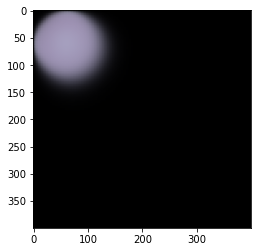

In [14]:
plt.imshow(img_mean_healthy.astype(np.uint8))

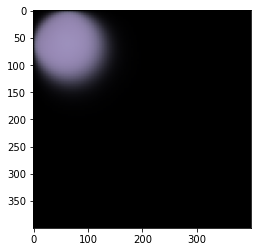

In [15]:
plt.imshow(img_mean_sick.astype(np.uint8))

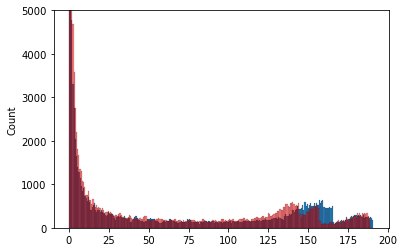

In [16]:
sns.histplot(img_mean_healthy.ravel(), bins = 256, alpha = 0.95)
sns.histplot(img_mean_sick.ravel(), bins = 256, color = "r",alpha = 0.5)
plt.ylim(0,5000)
plt.show()

In [17]:
PATH_DATA_EDA

'../data/eda'

In [18]:
os.makedirs(PATH_DATA_EDA, exist_ok=True)

In [19]:
# https://www.thoughtco.com/using-pickle-to-save-objects-2813661
utils.pickel_save(img_mean_healthy, PATH_DATA_EDA + "/" + "img_mean_healthy.pkl")
utils.pickel_save(img_mean_sick, PATH_DATA_EDA + "/" + "img_mean_sick.pkl")